In [1]:
import jax.numpy as jnp
import jax
import src.models
from experiments.plotting import plot_score_variable_y, plot_score_error_variable_y

import orbax.checkpoint
from src.training import utils
import flax.linen as nn

Setup to load in checkpoint

In [6]:
from experiments.ou.train_score_distributed_endpt import *

orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

train_step, params, opt_state = utils.create_train_step_variable_y(jax.random.PRNGKey(0), model, optimiser, *model_init_sizes, dt=dt, score=score_fn)

target = {"params": params, "opt_state": opt_state, "sde": sde, "network": network, "training": training}

restored = orbax_checkpointer.restore(checkpoint_path)
params = restored["params"]

trained_score = utils.trained_score_variable_y(model, params)


In [7]:
from src.data_generate_sde import sde_ornstein_uhlenbeck
from tueplots import bundles
import matplotlib.pyplot as plt

bundle = bundles.neurips2023()
plt.rcParams.update(bundle)

true_score = sde_ornstein_uhlenbeck.score

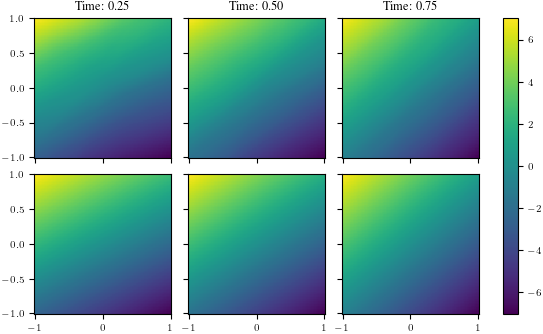

In [8]:
fig, axs = plot_score_variable_y(true_score, trained_score, -1, 1, -1, 1)
plt.savefig('ou_score_varied_y_-1.0_to_1.0.pdf')
plt.show()

In [ ]:
plot_score_error_variable_y(true_score, trained_score, -3, 3, -1, 1)